In [4]:
# prompt: install numpy version 1.2

!pip install numpy==1.24.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 91.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.0 which is incompatible.
seaborn 0.13.2 requires numpy!=1.24.0,>=1.20, but you have numpy 1.24.0 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.24.0 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.0 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.24.0 which is incompatible.
blosc2 3.5.0 requires numpy>=1.26, but you have numpy 1.24.0 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.0 which is 

In [1]:
import pmdarima as pm

In [3]:
import pandas as pd

data = pd.read_excel("/content/EVDS (7) (1).xlsx")
print(data)

       Tarih  Dolar Fiyat
0    2000-01       284.30
1    2000-02       300.70
2    2000-03       285.30
3    2000-04       279.40
4    2000-05       275.90
..       ...          ...
280  2023-05      1982.26
281  2023-06      1953.50
282  2023-07      1947.71
283  2023-08      1916.86
284  2023-09      1918.78

[285 rows x 2 columns]


In [4]:
print(data.dtypes)

Tarih           object
Dolar Fiyat    float64
dtype: object


In [5]:
tarih = pd.date_range("01.01.2000", periods=len(data), freq="M")
data["Tarih"] = tarih
data.set_index("Tarih", inplace=True)
print(data)

            Dolar Fiyat
Tarih                  
2000-01-31       284.30
2000-02-29       300.70
2000-03-31       285.30
2000-04-30       279.40
2000-05-31       275.90
...                 ...
2023-05-31      1982.26
2023-06-30      1953.50
2023-07-31      1947.71
2023-08-31      1916.86
2023-09-30      1918.78

[285 rows x 1 columns]


/tmp/ipython-input-5-2981696776.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tarih = pd.date_range("01.01.2000", periods=len(data), freq="M")


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pmdarima.arima import auto_arima

data2 = data.iloc[:-12]
sonyıl= data.iloc[-12:]

model = auto_arima(data2,trace=False,seasonal=False)

hata = model.resid()

ACF = sm.tsa.stattools.acf(hata,qstat=True,nlags=10)

otokor= {"Gecikme":range(1,11),"ACF":np.round(ACF[0][1:],3),"Prob":np.round(ACF[2],3)}

df = pd.DataFrame(otokor)
print(df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

   Gecikme    ACF   Prob
0        1  0.006  0.917
1        2 -0.017  0.954
2        3 -0.028  0.957
3        4 -0.019  0.981
4        5  0.092  0.731
5        6  0.055  0.726
6        7 -0.037  0.776
7        8 -0.115  0.454
8        9 -0.009  0.553
9       10  0.028  0.625


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [7]:
from statsmodels.stats.diagnostic import acorr_ljungbox

print(acorr_ljungbox(hata,lags=10))

     lb_stat  lb_pvalue
1   0.010847   0.917051
2   0.095207   0.953512
3   0.316928   0.956814
4   0.415838   0.981160
5   2.795466   0.731483
6   3.637408   0.725607
7   4.029648   0.776356
8   7.795747   0.453672
9   7.818438   0.552542
10  8.040982   0.624834


In [9]:
gelecek,guven_aralık = model.predict(12,return_conf_int=True)

print(gelecek)

2022-10-31    1663.719685
2022-11-30    1668.784810
2022-12-31    1673.849934
2023-01-31    1678.915059
2023-02-28    1683.980184
2023-03-31    1689.045308
2023-04-30    1694.110433
2023-05-31    1699.175557
2023-06-30    1704.240682
2023-07-31    1709.305806
2023-08-31    1714.370931
2023-09-30    1719.436055
Freq: ME, dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


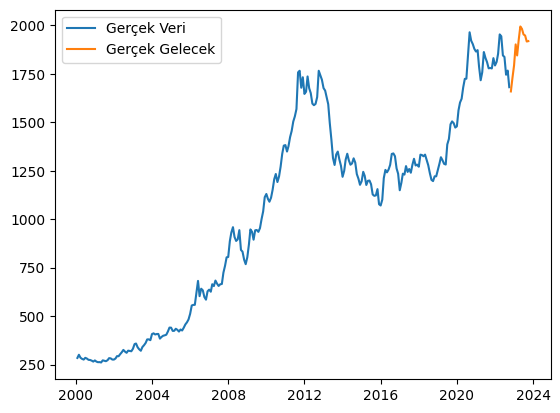

In [10]:
plt.plot(data2,label="Gerçek Veri")
plt.plot(sonyıl,label="Gerçek Gelecek")
plt.legend()
plt.show()

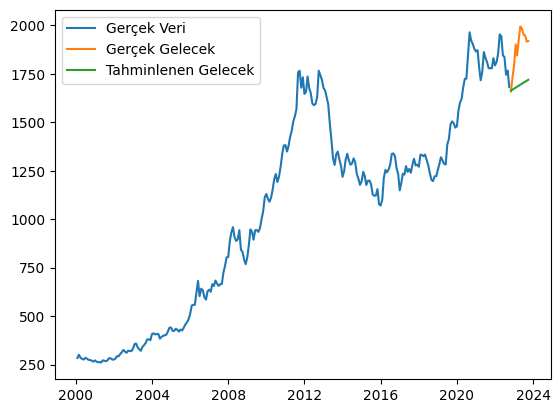

In [11]:
plt.plot(data2,label="Gerçek Veri")
plt.plot(sonyıl,label="Gerçek Gelecek")
plt.plot(gelecek,label="Tahminlenen Gelecek")
plt.legend()
plt.show()

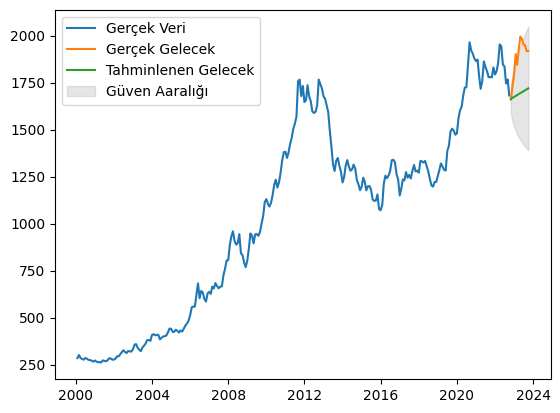

In [12]:
plt.plot(data2,label="Gerçek Veri")
plt.plot(sonyıl,label="Gerçek Gelecek")
plt.plot(gelecek,label="Tahminlenen Gelecek")
plt.fill_between(gelecek.index,guven_aralık[:,0],guven_aralık[:,1],alpha=0.2,color="gray",label="Güven Aaralığı")
plt.legend()
plt.show()